In [5]:
import numpy as np
import tensorflow as tf
import random

SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

import d2d
import importlib
importlib.reload(d2d)
import pandas as pd
import os




In [6]:
file = "/data/fast0/datasets/Rhone_data_continuous_highpass.h5"

filt = 'Highpass'

history = {}
val_performance = {}
performance = {}

#window_width = [1,2,5, 200]
window_width = [2, 5, 100, 3000]
#window_width = 100
batch_num = [64, 32, 32, 1]


for ww, bn in zip(window_width, batch_num):
#for window_input_width in window_width:
    
#     SEED = 1
#     random.seed(SEED)
#     np.random.seed(SEED)
#     tf.random.set_seed(SEED)
    
    linear_model, lstm_model, dnn_model,  df_all_chan,  input_columns, das_data_all, f  = d2d.import_data(filename = file)

    da = df_all_chan.to_numpy()

    multi_step_window_shuffled = d2d.WindowGenerator(df_all_chan,
                                                    input_width=ww,
                                                    label_width=1, 
                                                    shift=0,
                                                    label_columns=['Discharge'],
                                                    input_columns=input_columns,
                                                    shuffle=True,
                                                    batch_size=bn)
    
    
    import matplotlib
    import matplotlib.pyplot as plt
    
    
    
    history['lstm_'+str(ww)+'_'+filt+str(bn)] = d2d.compile_and_fit(lstm_model, multi_step_window_shuffled, learning_rate = 0.001)

    val_performance['lstm_'+str(ww)+'_'+filt+str(bn)] = lstm_model.evaluate(multi_step_window_shuffled.val)
    performance['lstm_'+str(ww)+'_'+filt+str(bn)] = lstm_model.evaluate(multi_step_window_shuffled.test, verbose=0)


Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>


/home/jmanos/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Epoch 1/100
343/343 [==============================] - 3s 5ms/step - loss: 0.1705 - mean_absolute_error: 0.2973 - val_loss: 0.0802 - val_mean_absolute_error: 0.2000
Epoch 2/100
343/343 [==============================] - 1s 4ms/step - loss: 0.0658 - mean_absolute_error: 0.1816 - val_loss: 0.0597 - val_mean_absolute_error: 0.1710
Epoch 3/100
343/343 [==============================] - 1s 4ms/step - loss: 0.0490 - mean_absolute_error: 0.1559 - val_loss: 0.0538 - val_mean_absolute_error: 0.1597
Epoch 4/100
343/343 [==============================] - 1s 4ms/step - loss: 0.0440 - mean_absolute_error: 0.1452 - val_loss: 0.0411 - val_mean_absolute_error: 0.1396
Epoch 5/100
343/343 [==============================] - 1s 4ms/step - loss: 0.0330 - mean_absolute_error: 0.1260 - val_loss: 0.0389 - val_mean_absolute_error: 0.1340
Epoch 6/100
343/343 [==============================] - 1s 4ms/step - loss: 0.0313 - mean_absolute_error: 0.1200 - val_loss: 0.0356 - val_mean_absolute_error: 0.1255
Epoch 7/10

275/275 [==============================] - 2s 5ms/step - loss: 0.2678 - mean_absolute_error: 0.3853 - val_loss: 0.1302 - val_mean_absolute_error: 0.2692
Epoch 2/100
275/275 [==============================] - 1s 4ms/step - loss: 0.1146 - mean_absolute_error: 0.2480 - val_loss: 0.0920 - val_mean_absolute_error: 0.2248
Epoch 3/100
275/275 [==============================] - 1s 4ms/step - loss: 0.0798 - mean_absolute_error: 0.2027 - val_loss: 0.0802 - val_mean_absolute_error: 0.2040
Epoch 4/100
275/275 [==============================] - 1s 4ms/step - loss: 0.0644 - mean_absolute_error: 0.1808 - val_loss: 0.0793 - val_mean_absolute_error: 0.2092
Epoch 5/100
275/275 [==============================] - 1s 5ms/step - loss: 0.0565 - mean_absolute_error: 0.1680 - val_loss: 0.0719 - val_mean_absolute_error: 0.1954
Epoch 6/100
275/275 [==============================] - 1s 5ms/step - loss: 0.0469 - mean_absolute_error: 0.1542 - val_loss: 0.0574 - val_mean_absolute_error: 0.1714
Epoch 7/100
275/275 [=

14/14 [==============================] - 1s 53ms/step - loss: 0.1639 - mean_absolute_error: 0.3108 - val_loss: 0.1600 - val_mean_absolute_error: 0.3062
Epoch 8/100
14/14 [==============================] - 1s 54ms/step - loss: 0.1363 - mean_absolute_error: 0.2810 - val_loss: 0.1433 - val_mean_absolute_error: 0.2865
Epoch 9/100
14/14 [==============================] - 1s 53ms/step - loss: 0.1111 - mean_absolute_error: 0.2545 - val_loss: 0.1255 - val_mean_absolute_error: 0.2665
Epoch 10/100
14/14 [==============================] - 1s 54ms/step - loss: 0.0939 - mean_absolute_error: 0.2327 - val_loss: 0.1113 - val_mean_absolute_error: 0.2487
Epoch 11/100
14/14 [==============================] - 1s 55ms/step - loss: 0.0874 - mean_absolute_error: 0.2226 - val_loss: 0.1054 - val_mean_absolute_error: 0.2392
Epoch 12/100
14/14 [==============================] - 1s 53ms/step - loss: 0.0736 - mean_absolute_error: 0.2045 - val_loss: 0.0962 - val_mean_absolute_error: 0.2241
Epoch 13/100
14/14 [=====

Epoch 11/100
14/14 [==============================] - 6s 413ms/step - loss: 0.0828 - mean_absolute_error: 0.2038 - val_loss: 0.1085 - val_mean_absolute_error: 0.2180
Epoch 12/100
14/14 [==============================] - 6s 417ms/step - loss: 0.0616 - mean_absolute_error: 0.1807 - val_loss: 0.1011 - val_mean_absolute_error: 0.2185
Epoch 13/100
14/14 [==============================] - 6s 412ms/step - loss: 0.0500 - mean_absolute_error: 0.1582 - val_loss: 0.0927 - val_mean_absolute_error: 0.2120
Epoch 14/100
14/14 [==============================] - 6s 411ms/step - loss: 0.0419 - mean_absolute_error: 0.1431 - val_loss: 0.0802 - val_mean_absolute_error: 0.1962
Epoch 15/100
14/14 [==============================] - 6s 413ms/step - loss: 0.0378 - mean_absolute_error: 0.1350 - val_loss: 0.0712 - val_mean_absolute_error: 0.1835
Epoch 16/100
14/14 [==============================] - 6s 412ms/step - loss: 0.0339 - mean_absolute_error: 0.1283 - val_loss: 0.0698 - val_mean_absolute_error: 0.1809
Epoc

In [7]:
history

{'lstm_2_Highpass64': <tensorflow.python.keras.callbacks.History at 0x7ff1681c09a0>,
 'lstm_5_Highpass32': <tensorflow.python.keras.callbacks.History at 0x7ff169d1c760>,
 'lstm_100_Highpass32': <tensorflow.python.keras.callbacks.History at 0x7ff14cbafac0>,
 'lstm_3000_Highpass1': <tensorflow.python.keras.callbacks.History at 0x7ff15082dfd0>}

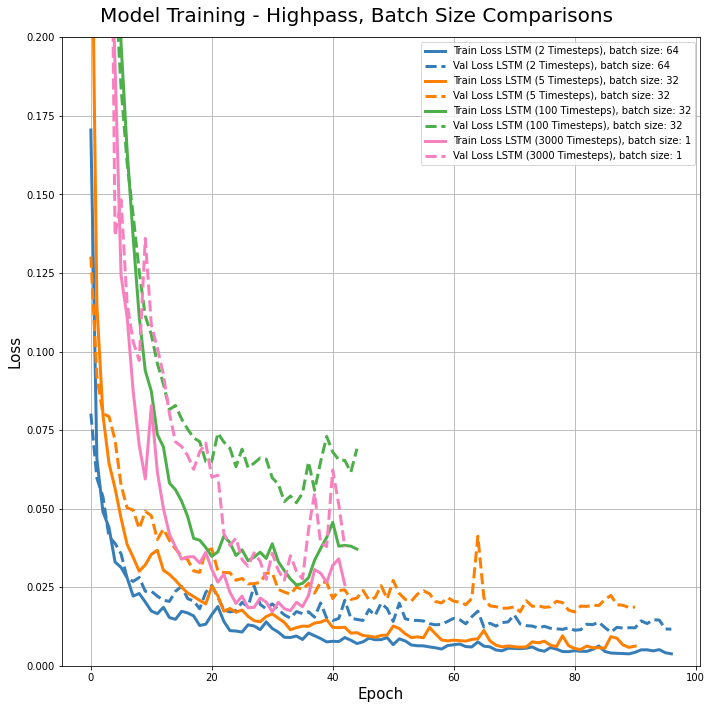

In [9]:
colors =['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf']
fig, ax = plt.subplots(figsize=(10,10))
for hist, leg, c in zip(
    ('lstm_'+str(window_width[0])+'_Highpass'+str(batch_num[0]),
     'lstm_'+str(window_width[1])+'_Highpass'+str(batch_num[1]),
     'lstm_'+str(window_width[2])+'_Highpass'+str(batch_num[2]), 
     'lstm_'+str(window_width[3])+'_Highpass'+str(batch_num[3])),
                            ('LSTM ('+str(window_width[0])+' Timesteps), batch size: '+str(batch_num[0]),
                             'LSTM ('+str(window_width[1])+' Timesteps), batch size: '+str(batch_num[1]),
                             'LSTM ('+str(window_width[2])+' Timesteps), batch size: '+str(batch_num[2]),
                             'LSTM ('+str(window_width[3])+' Timesteps), batch size: '+str(batch_num[3])),
                          colors):
    
    ax.plot(history[hist].history['loss'], label='Train Loss '+leg,linewidth=3, c=c)
    ax.plot(history[hist].history['val_loss'], label='Val Loss '+leg,linewidth=3, ls='--', c=c)
    
fig.patch.set_facecolor('white')
ax.set_ylabel('Loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylim((0, .2))
ax.grid()
ax.legend()
fig.suptitle('Model Training - Highpass, Batch Size Comparisons', fontsize = 20)

plt.tight_layout()
plt.show()

In [ ]:
#plt.imshow(multi_step_window_shuffled.train_channels_normed[1][0],aspect='auto', vmin = -2, vmax=2)

In [ ]:
#plt.imshow(multi_step_window_shuffled.train_channels_normed[1][1],aspect='auto', vmin = -5, vmax=5)

In [ ]:
#plt.imshow(multi_step_window_shuffled.train_channels_normed[0][16])

In [ ]:
file = "/data/fast0/datasets/Rhone_data_continuous_highpass.h5"

filt = 'Highpass'

history = {}
val_performance = {}
performance = {}

#window_width = [1,2,5, 200]
#window_width = [350, 400, 450, 500]
window_width = [1000,1500,2000,2500]
batch_size = [2,2,2,2]


for ww, bs in zip(window_width,batch_size):
#for window_input_width in window_width:
    
    SEED = 1
    random.seed(SEED)
    np.random.seed(SEED)
    tf.random.set_seed(SEED)
    
    linear_model, lstm_model, dnn_model,  df_all_chan,  input_columns  = d2d.import_data(filename = file)

    da = df_all_chan.to_numpy()

    window_input_width = window_input_width

    multi_step_window_shuffled = d2d.WindowGenerator(df_all_chan,
                                                    input_width=ww,
                                                    label_width=1, 
                                                    shift=0,
                                                    label_columns=['Discharge'],
                                                    input_columns=input_columns,
                                                    shuffle=True,
                                                    batch_size=bs)
    
    
    
    history['lstm_'+str(ww)+'_'+filt] = d2d.compile_and_fit(lstm_model, multi_step_window_shuffled, learning_rate = 0.001)

    val_performance['lstm_'+str(ww)+'_'+filt] = lstm_model.evaluate(multi_step_window_shuffled.val)
    performance['lstm_'+str(ww)+'_'+filt] = lstm_model.evaluate(multi_step_window_shuffled.test, verbose=0)

In [ ]:
print(history)

In [ ]:
    
import matplotlib
import matplotlib.pyplot as plt

colors =['red', 'orange', 'blue', 'purple']
fig, ax = plt.subplots(figsize=(25,25))

for hist, legend, c in zip(('lstm_'+str(window_width[0])+'_Highpass','lstm_'+str(window_width[1])+'_Highpass','lstm_'+str(window_width[2])+'_Highpass', 'lstm_'+str(window_width[3])+'_Highpass'),
                            ('LSTM Highpass ('+str(window_width[0])+' Timesteps)','LSTM Highpass ('+str(window_width[1])+' Timesteps)','LSTM Highpass ('+str(window_width[2])+' Timesteps)','LSTM Highpass ('+str(window_width[3])+' Timesteps)'),
                          colors):
        ax.plot(history[hist].history['loss'], label='Train Loss '+legend,linewidth=3, c=c)
        ax.plot(history[hist].history['val_loss'], label='Val Loss '+legend,linewidth=3, ls='--', c=c)
    
fig.patch.set_facecolor('white')
ax.set_ylabel('Loss', size=30)
ax.set_xlabel('Epoch', size=30)
ax.set_ylim((0, 1))
ax.grid()
ax.legend()
fig.suptitle('Model Training - Highpass, Window Size Comparisons - 32 Batch', fontsize = 50)

plt.tight_layout()
plt.show()

# Test run of the best parameterization I could find

#### batch size = 2
#### window width = 2000

In [ ]:
file = "/data/fast0/datasets/Rhone_data_continuous_highpass.h5"

filt = 'Highpass'

history = {}
val_performance = {}
performance = {}

#window_width = [1,2,5, 200]
#window_width = [350, 400, 450, 500]
ww = 10000
bs = 1

SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)



linear_model, lstm_model, dnn_model,  df_all_chan,  input_columns  = d2d.import_data(filename = file)

da = df_all_chan.to_numpy()

window_input_width = window_input_width

multi_step_window_shuffled = d2d.WindowGenerator(df_all_chan,
                                                input_width=ww,
                                                label_width=1, 
                                                shift=0,
                                                label_columns=['Discharge'],
                                                input_columns=input_columns,
                                                shuffle=True,
                                                batch_size=bs)

In [ ]:
history['lstm_'+str(ww)+'_'+filt] = d2d.compile_and_fit(lstm_model, multi_step_window_shuffled, learning_rate = 0.001)

val_performance['lstm_'+str(ww)+'_'+filt] = lstm_model.evaluate(multi_step_window_shuffled.val)
performance['lstm_'+str(ww)+'_'+filt] = lstm_model.evaluate(multi_step_window_shuffled.test, verbose=0)

In [ ]:
fig, ax = plt.subplots(figsize=(25,25))

ax.plot(history['lstm_'+str(ww)+'_'+filt].history['loss'], label='Train Loss ('+str(ww)+' Timesteps)',linewidth=3, c='red')
ax.plot(history['lstm_'+str(ww)+'_'+filt].history['val_loss'], label='Val Loss ('+str(ww)+' Timesteps)',linewidth=3, ls='--', c='red')

fig.patch.set_facecolor('white')
ax.set_ylabel('Loss', size=30)
ax.set_xlabel('Epoch', size=30)
ax.set_ylim((0, 1))
ax.grid()
ax.legend()
fig.suptitle('Model Training - Highpass, Window Size: 2000, Batch Size: 2', fontsize = 50)

plt.tight_layout()
plt.show()

In [ ]:
pred_on_val = lstm_model.predict(multi_step_window_shuffled.val)
pred_on_val

In [ ]:
true_dis_val = []

for i in multi_step_window_shuffled.val.as_numpy_iterator():
    true_dis_val.append(i[1])

true_dis_val = np.asarray(true_dis_val)
true_dis_val = true_dis_val.squeeze()

In [ ]:
true_dis_val= true_dis_val.reshape(6,1)

In [ ]:
plt.scatter(pred_on_val,true_dis_val)

In [ ]:
units=32 #found in the layer compile and model creation e.g. .LSTM(units)
weights = lstm_model.layers[0].get_weights()[0]

input_gate = weights[:, :units]
forget_gate = weights[:, units: units * 2]
cell_state = weights[:, units * 2: units * 3]
output = weights[:, units * 3:]

print(weights.shape)
weights

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure(figsize=(20,15))
fig.patch.set_facecolor('white')

ax0 = fig.add_subplot(221)
im0 = ax0.imshow(input_gate, aspect = 'auto', vmin=-.1, vmax=.1)
ax0.set_ylabel('Channels')
ax0.set_xlabel('Unit')
ax0.set_title('Input Gate')

divider = make_axes_locatable(ax0)
cax = divider.append_axes('right', size='5%', pad=0.05)
clb = fig.colorbar(im0, cax=cax, orientation='vertical', )
clb.ax.set_ylabel('Weight', labelpad=-111)

ax1 = fig.add_subplot(222)
im1 = ax1.imshow(forget_gate, aspect = 'auto', vmin=-.1, vmax=.1)
ax1.set_title('Forget Gate')

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

ax2 = fig.add_subplot(223)
im2 = ax2.imshow(cell_state, aspect = 'auto', vmin=-.1, vmax=.1)
ax2.set_title('Cell State')

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

ax3 = fig.add_subplot(224)
im3 = ax3.imshow(output, aspect = 'auto', vmin=-.1, vmax=.1)
ax3.set_title('Output Gate')

divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im3, cax=cax, orientation='vertical')

plt.tight_layout()
plt.show()

# Returning sequences works well enough to drop the window down

In [ ]:
import numpy as np
import tensorflow as tf
import random
import sys
import eli5

SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

import d2d
import importlib
importlib.reload(d2d)
import pandas as pd
import os

In [ ]:
file = "/data/fast0/datasets/Rhone_data_continuous_highpass.h5"

filt = 'Highpass'

history = {}
val_performance = {}
performance = {}

#window_width = [1,2,5, 200]
#window_width = [350, 400, 450, 500]
ww = 200
bs = 32

SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)



linear_model, lstm_model, dnn_model,  df_all_chan,  input_columns, das_data_all, f  = d2d.import_data(filename = file)

da = df_all_chan.to_numpy()

multi_step_window_shuffled = d2d.WindowGenerator(df_all_chan,
                                                input_width=ww,
                                                label_width=1, 
                                                shift=0,
                                                label_columns=['Discharge'],
                                                input_columns=input_columns,
                                                shuffle=True,
                                                batch_size=bs)

In [ ]:
history['lstm_'+str(ww)+'_'+filt] = d2d.compile_and_fit(lstm_model, multi_step_window_shuffled, learning_rate = 0.001)

val_performance['lstm_'+str(ww)+'_'+filt] = lstm_model.evaluate(multi_step_window_shuffled.val)
performance['lstm_'+str(ww)+'_'+filt] = lstm_model.evaluate(multi_step_window_shuffled.test, verbose=0)

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(25,25))

ax.plot(history['lstm_'+str(ww)+'_'+filt].history['loss'], label='Train Loss ('+str(ww)+' Timesteps)',linewidth=3, c='red')
ax.plot(history['lstm_'+str(ww)+'_'+filt].history['val_loss'], label='Val Loss ('+str(ww)+' Timesteps)',linewidth=3, ls='--', c='red')

fig.patch.set_facecolor('white')
ax.set_ylabel('Loss', size=30)
ax.set_xlabel('Epoch', size=30)
ax.set_ylim((0, 1))
ax.grid()
ax.legend()
fig.suptitle('Model Training - Highpass, Window Size: 400, Batch Size: 16', fontsize = 50)

plt.tight_layout()
plt.show()

In [ ]:
lstm_model.summary()

In [ ]:
len(lstm_model.layers[0].get_weights())

In [ ]:
units=32 #found in the layer compile and model creation e.g. .LSTM(units)
weights = lstm_model.layers[0].get_weights()[0]

input_gate = weights[:, :units]
forget_gate = weights[:, units: units * 2]
cell_state = weights[:, units * 2: units * 3]
output = weights[:, units * 3:]

print(weights.shape)
weights

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
v1=-0.03
v2=0.03

fig = plt.figure(figsize=(20,15))

ax0 = fig.add_subplot(221)
im0 = ax0.imshow(input_gate, aspect = 'auto',vmin=v1,vmax=v2)
ax0.set_ylabel('Channels')
ax0.set_xlabel('Unit')
ax0.set_title('Input Gate')

divider = make_axes_locatable(ax0)
cax = divider.append_axes('right', size='5%', pad=0.05)
clb = fig.colorbar(im0, cax=cax, orientation='vertical', )
clb.ax.set_ylabel('Weight', labelpad=-97)

ax1 = fig.add_subplot(222)
im1 = ax1.imshow(forget_gate, aspect = 'auto',vmin=v1,vmax=v2)
ax1.set_title('Forget Gate')

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

ax2 = fig.add_subplot(223)
im2 = ax2.imshow(cell_state, aspect = 'auto',vmin=v1,vmax=v2)
ax2.set_title('Cell State')

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

ax3 = fig.add_subplot(224)
im3 = ax3.imshow(output, aspect = 'auto',vmin=v1,vmax=v2)
ax3.set_title('Output Gate')

divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im3, cax=cax, orientation='vertical')


# ax0.set_ylabel('Channels')
# ax0.set_xlabel('LSTM Unit')

# ax0.set_title('Input Weights')
# ax1.set_title('Forget Gate')
# ax2.set_title('Cell State')
# ax3.set_title('Output')
fig.patch.set_facecolor('white')
plt.tight_layout()
plt.show()

In [ ]:
fig,ax=plt.subplots()
fig.patch.set_facecolor('w')
plt.plot(np.mean(input_gate,axis=0))

fig,ax=plt.subplots()
fig.patch.set_facecolor('w')
plt.plot(np.mean(input_gate,axis=1))

fig,ax=plt.subplots()
fig.patch.set_facecolor('w')
plt.hist(np.abs(input_gate).flatten(),40)

fig,ax=plt.subplots()
fig.patch.set_facecolor('w')
plt.hist(np.mean(np.abs(input_gate),axis=1).flatten(),40)

In [ ]:
pred_on_test = lstm_model.predict(multi_step_window_shuffled.test).squeeze()
pred_on_test = np.asarray(pred_on_test)
pred_on_test = pred_on_test[:,-1]
pred_on_test

In [ ]:

predictions_test = (pred_on_test * multi_step_window_shuffled.dis_std) + multi_step_window_shuffled.dis_mean

test_true_dis = []

for i in multi_step_window_shuffled.test.as_numpy_iterator():
    test_true_dis.append(i[1])
    
test_true_dis = (test_true_dis[0].squeeze() * multi_step_window_shuffled.dis_std) + multi_step_window_shuffled.dis_mean

fig = plt.figure(figsize=(10,10))
fig.patch.set_facecolor('white')
plt.scatter(test_true_dis,predictions_test)
plt.plot([5,17],[5,17], color='black')
plt.ylim([5,17])
plt.xlim([5,17])
plt.ylabel('Predicted Discharge $(m^3/s)$')
plt.xlabel('Observed Discharge $(m^3/s)$')
plt.show()

In [ ]:
window_no_shuf = d2d.WindowGenerator(df_all_chan,
                                                input_width=ww,
                                                label_width=1, 
                                                shift=0,
                                                label_columns=['Discharge'],
                                                input_columns=input_columns,
                                                shuffle=True,
                                                batch_size=bs)
train_data = []
for i in window_no_shuf.train.as_numpy_iterator():
    train_data.append(i[0])

In [ ]:
train_data = np.asarray(train_data)
train_data.shape

train_data = np.reshape(train_data, (train_data.shape[0]*train_data.shape[1], ww, train_data.shape[3]))

In [ ]:
pred_on_train = lstm_model.predict(train_data)

train_dis = []
for i in window_no_shuf.train.as_numpy_iterator():
    train_dis.append(i[1])
train_dis = np.asarray(train_dis).squeeze().reshape(112,)

pred_on_train = pred_on_train.squeeze()
pred_on_train = pred_on_train[:,-1]

train_obs_dis = (train_dis *multi_step_window_shuffled.dis_std)+multi_step_window_shuffled.dis_mean
pred_train_data = (pred_on_train *multi_step_window_shuffled.dis_std)+multi_step_window_shuffled.dis_mean

fig = plt.figure(figsize=(20,10))
fig.patch.set_facecolor('white')
plt.plot(train_obs_dis, label = 'Train Data - Observed Discharge', )
plt.plot(pred_train_data, label = 'Train Data - Predicted Discharge')
fig.suptitle('Train Data Predictions - Highpass, Window Size: 400, Batch Size: 16', fontsize = 30)
plt.tight_layout()
plt.legend()
plt.show()

# Synthetic input (sine wave over all channels)


In [ ]:
'''

array of x(Channels) by t(time)
f(x,t) = sin(t) (or 2pi*t/T)

'''


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


Fs = 86400
f = 1
sample = 400
x = np.arange(sample)
y = np.sin(2 * np.pi * f * x / Fs)
#print(y)
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.plot(x, y)
ax.set_xlabel('sample(n)')
ax.set_title('Diurnal Sine Wave All Channels')
plt.show()

In [ ]:
arr = []

for i in y:
    arr.append([i]*2308)

sin_arr = np.asarray(arr)
sin_arr = np.reshape(sin_arr, (1, 400, 2308))
print(sin_arr.shape)

In [ ]:
pred_sin = lstm_model.predict(sin_arr)

In [ ]:
pred_sin

In [ ]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.plot(pred_sin.squeeze())
ax.set_xlabel('sample(n)')
ax.set_title('Diurnal Sine Wave All Channels')
ax.annotate('One batch of size 1 input (shape (1,400,2308))',(0,0.35))
ax.annotate('Returns prediction for each timestep?',(0,0.30))
plt.show()

# Synthetic input (or one channel has a an input of 1 and all else 0)

In [ ]:
channel_num = 750

arr_delta = [0]*2308
arr_delta[channel_num] = 1

In [ ]:
delta_func = [arr_delta]*400
delta_func = np.asarray(delta_func)
delta_func = delta_func.reshape(1,400,2308)

In [ ]:
pred_delta = lstm_model.predict_step(delta_func)

In [ ]:
pred_delta

In [ ]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.plot(np.asarray(pred_delta).squeeze())
ax.set_xlabel('sample(n)')
ax.set_title('Discharge Prediction, Chan 750 = 1, All else = 0')
ax.annotate('One batch of size 1 input shape (1,400,2308)',(20,0.06))
ax.annotate('Returns prediction for each timestep, but levels off?',(20,0.055))
ax.annotate('Maybe only the last prediction matters?',(20,0.05))
plt.show()



# Varying the Sine Wave Period and Channel Number

In [ ]:
channel_num = 900

arr_delta = [0]*2308
arr_delta[channel_num] = 1

delta_func = [arr_delta]*400
delta_func = np.asarray(delta_func)
delta_func = delta_func.reshape(1,400,2308)

pred_delta = lstm_model.predict_step(delta_func)

In [ ]:

Fs = 86400/1
f = 1
sample = 86400
x = np.arange(sample)
y = np.sin(2 * np.pi * f * x / Fs)
#print(y)
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.plot(x, y)
ax.set_xlabel('sample(n)')
ax.set_title('Diurnal Sine Wave All Channels')
plt.show()

In [ ]:
arr = []

for i in y:
    arr.append([i]*2308)

sin_arr = np.asarray(arr)
sin_arr = np.reshape(sin_arr, (1, 400, 2308))
print(sin_arr.shape)

pred_sin = lstm_model.predict(sin_arr)

In [ ]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.plot(np.asarray(pred_delta).squeeze(), label = 'Channel 1500 = 1')
plt.plot(pred_sin.squeeze(), label = 'Sine Wave: 2hr period')
ax.set_xlabel('sample(n)')
ax.set_title('Discharge Prediction, Varied Sine Wave and Chan = 1500')
ax.legend()
plt.show()



In [ ]:
#Multiple periods on one graph

from fractions import Fraction
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')

period = [1,2,4,8,16,32,64]

for p in period:
    Fs = 86400/p
    f = 1
    sample = 400
    x = np.arange(sample)
    y = np.sin(2 * np.pi * f * x / Fs)
    arr = []

    for i in y:
        arr.append([i]*2308)

    sin_arr = np.asarray(arr)
    
    sin_arr = np.reshape(sin_arr, (1, 400, 2308))

    pred_sin = lstm_model.predict(sin_arr)
    
    plt.plot(pred_sin.squeeze(), label = 'period = '+str(Fraction(1/p))+'days')
    
ax.set_xlabel('sample(n)')
ax.set_title('Sine Wave All Channels')
ax.legend()
plt.show()

In [ ]:
channel_number = list(np.arange(0, 2308,1))

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')

channel_discharge = []

for i in channel_number:
    channel_num = i

    arr_delta = [0]*2308
    arr_delta[channel_num] = 1

    delta_func = [arr_delta]*400
    delta_func = np.asarray(delta_func)
    delta_func = delta_func.reshape(1,400,2308)

    pred_delta = lstm_model.predict(delta_func)
    
    channel_discharge.append(np.asarray(pred_delta).squeeze()[-1])
    
    #plt.plot(np.asarray(pred_delta).squeeze(), label = 'Channel '+str(i)+' = 1')
    
    

In [ ]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.plot(channel_number,channel_discharge)   
ax.set_xlabel('Channel Number')
ax.set_ylabel('Discharge')
ax.set_title('Varying Channel = 1, All else = 0')
#ax.legend()
plt.show()

In [ ]:
#Loop over many periods

sine_ts = []

from fractions import Fraction
# fig, ax = plt.subplots()
# fig.patch.set_facecolor('white')

#period = [0.25,0.5,1,4,16,32,128, 512]

period = list(np.arange(0.001, 4, .01))
color = plt.cm.viridis(np.linspace(0,1,len(period)))

for p,c in zip(period,color):
    Fs = 86400/p
    f = 1
    sample = 400
    x = np.arange(sample)
    y = np.sin(2 * np.pi * f * x / Fs)
    arr = []

    for i in y:
        arr.append([i]*2308)

    sin_arr = np.asarray(arr)
    
    sin_arr = np.reshape(sin_arr, (1, 400, 2308))

    pred_sin = lstm_model.predict(sin_arr)
    
    sine_ts.append(pred_sin.squeeze())
    
    #c= next(color)
    #plt.plot(pred_sin.squeeze(), label = 'period = '+str(Fraction(1/p))+'days', c=c)
    
# ax.set_xlabel('sample(n)')
# ax.set_title('Sine Wave All Channels')
# #ax.legend(bbox_to_anchor=(1.1, 1.05))
# plt.show()

In [ ]:
sine_ts = np.asarray(sine_ts)
sine_ts.shape

In [ ]:
from matplotlib.ticker import FormatStrFormatter
fig, ax = plt.subplots(figsize=[15,15])
fig.patch.set_facecolor('white')
ax.set_ylabel('Frequency (per day)')
ax.set_xlabel('Sample in timeseries')
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

ax.set_yticks(np.arange(len(period)))
ax.set_yticklabels(period)

ax.set_title('Discharge with varying sine wave periods')
plt.pcolor(sine_ts)
plt.locator_params(axis='y', nbins=6)
plt.colorbar()
plt.show()

# Gaussian pulse iterated over each channel

In [ ]:
import numpy as np
x, y = np.meshgrid(np.linspace(-1,1,2308), np.linspace(-1,1,400))
d = np.sqrt(x*x+y*y)
sigma, mu = 1.0, 0.0
g = np.exp(-( (d-mu)**2 / ( 2.0 * sigma**2 ) ) )
print("2D Gaussian-like array:")
print(g)

In [ ]:
def gaussian_func(x, width = 1, center = 0):
    
    y = np.exp( -((x-center)/width)**2)
    
    return y

In [ ]:
y = gaussian_func(1)
print(y)

In [ ]:
x=np.arange(0,2308,1)
pulse_width = np.arange(1,40,1)

In [ ]:
moving_gaus = []

for i in x:
    chan = []
    for j in pulse_width:
        y = gaussian_func(x,center=i, width = j)
        gaus_arr = [y]*400

        gaus_arr = np.asarray(gaus_arr).reshape(1,400,2308)

        pred_gaus = lstm_model.predict(gaus_arr)
        pred_gaus = pred_gaus.squeeze()

        chan.append(pred_gaus[-1])
    
    moving_gaus.append(chan)
    #if i == 1: break

In [ ]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.set_ylabel('Gaussian Centered Channel')
ax.set_xlabel('Pulse Width (Channels)')
plt.pcolor(moving_gaus)
plt.colorbar(label ='Discharge')
plt.show()

In [ ]:
gaus_array = np.asarray(moving_gaus)[:,-1]
gaus_array

In [ ]:
print(gaus_array.shape)

In [ ]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.set_ylabel('Discharge')
ax.set_xlabel('Channel')
plt.plot(gaus_array)
plt.show()

In [ ]:
###MERGE SAVING###

# im1_loc = 'files/20200827_100043_1003_3B_AnalyticMS_SR_harmonized_clip_reproj_4326.tif'
# im2_loc = 'files/20200827_100044_1003_3B_AnalyticMS_SR_harmonized_clip_reproj_4326.tif'

# merged = 'files/rhone_merged.tif'

# rhone_image1 = rasterio.open('files/20200827_100043_1003_3B_AnalyticMS_SR_harmonized_clip_reproj_4326.tif')
# rhone_image2 = rasterio.open('files/20200827_100044_1003_3B_AnalyticMS_SR_harmonized_clip_reproj_4326.tif')

# rhone_mosaic, rhone_trans = merge([rhone_image1, rhone_image2])

# out_meta = rhone_image1.meta.copy()
# out_meta.update({'driver':'GTiff',
#                  'dtype':'uint16',
#                 'nodata':0.0,
#                 'width':rhone_mosaic.shape[2],
#                 'height':rhone_mosaic.shape[1],
#                 'count':4,
#                 'transform':rhone_trans})

# with rasterio.open(merged, 'w', **out_meta) as dset:
#     dset.write(rhone_mosaic)

# Figure 1 mapping

In [ ]:
# import matplotlib
# import shapefile as shp
# import matplotlib.pyplot as plt
# import rasterio
# from rasterio.plot import show
# from rasterio.merge import merge
# matplotlib.rcParams.update({'font.size': 22})

# sf = shp.Reader("Approximate_cable_location_fixed.shp")
# merged = 'files/rhone_merged.tif'
# rhone_image_mosaic = rasterio.open(merged)

# b1 = rhone_image_mosaic.read(1)
# b2 = rhone_image_mosaic.read(2)
# b3 = rhone_image_mosaic.read(3)

# rhone_color = np.array([b1,b2,b3]).transpose(1,2,0)
# norm = (rhone_color * (255/ np.max(rhone_color))).astype(np.uint8)

# fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2,figsize=[30,20])
# fig.patch.set_facecolor('white')

# for shape in sf.shapeRecords():
#     x = [i[0] for i in shape.shape.points[:]]
#     y = [i[1] for i in shape.shape.points[:]]
#     ax1.plot(x,y, color='red', linewidth=4)

# show(norm.transpose(2,0,1), transform = rhone_image_mosaic.transform,ax=ax1)

# #show(norm.transpose(2,0,1), transform = rhone_merged.transform,ax=ax1)

# # show(rhone_image2, transform = rhone_image2.transform,ax=ax1)
# # show(rhone_image1, transform = rhone_image1.transform,ax=ax1)

# ax1.legend(['Approximate Cable Location'], loc= 'lower right')
# ax1.set_title('Approximate Geographic Location', size=30)
# ax1.set_ylim(46.585,  46.637)
# ax1.set_xlim(8.374,  8.41)
# ax1.set_ylabel('Latitude', size=30)
# ax1.set_xlabel('Longitude', size=30)

# ax2.set_ylabel('Channel', size=30)
# ax2.set_xlabel('Discharge', size=30)
# ax2.set_title('Predicted (Gaussian Centered) Discharge', size=30)
# ax2.grid()
# ax2.plot(gaus_array,np.arange(0,2308,1))



# plt.show()



In [ ]:
# rhone_im_list = []
# for file in os.listdir("Rhone_10cm_images"):
#     if file.endswith("_reproj.tif"):
#         #rint(os.path.join("/Rhone_10cm_images", file))
#         rhone_im_list.append(os.path.join("Rhone_10cm_images", file))

In [ ]:
# opened_ims=[]
# for path in rhone_im_list:
#     open_rast = rasterio.open(path)
#     opened_ims.append(open_rast)

In [ ]:
# merged_10cm, trans_10cm = merge(opened_ims)

In [ ]:
# out_meta = opened_ims[0].meta.copy()
# out_meta.update({'driver':'GTiff',
#                  'dtype':'uint16',
#                 'nodata':0.0,
#                 'width':merged_10cm.shape[2],
#                 'height':merged_10cm.shape[1],
#                 'transform':trans_10cm})

# with rasterio.open('Rhone_10cm_images/Rhone_10cm_merged.tif', 'w', **out_meta) as dset:
#     dset.write(merged_10cm)

In [ ]:

### REPROJECTION ###
# import numpy as np
# import rasterio
# from rasterio.warp import calculate_default_transform, reproject, Resampling

# dst_crs = 'EPSG:4326'

# for i in rhone_im_list:
#     with rasterio.open(i) as src:
#         transform, width, height = calculate_default_transform(
#             src.crs, dst_crs, src.width, src.height, *src.bounds)
#         kwargs = src.meta.copy()
#         kwargs.update({
#             'crs': dst_crs,
#             'transform': transform,
#             'width': width,
#             'height': height
#         })

#         with rasterio.open(i[:-4]+'_reproj.tif', 'w', **kwargs) as dst:
#             for i in range(1, src.count + 1):
#                 reproject(
#                     source=rasterio.band(src, i),
#                     destination=rasterio.band(dst, i),
#                     src_transform=src.transform,
#                     src_crs=src.crs,
#                     dst_transform=transform,
#                     dst_crs=dst_crs,
#                     resampling=Resampling.nearest)


In [ ]:
### Saving with correct band combo ###

# profile  = rhone_image_mosaic_10cm.profile
# profile['photometric'] = 'RGB'
# with rasterio.open('Rhone_10cm_images/Rhone_10cm_merged.tif', 'w', **profile) as dst:
#     dst.write(rhone_image_mosaic_10cm.read())

In [ ]:
# import rasterio
# from rasterio.plot import show
# from rasterio.merge import merge
# import numpy as np
# import matplotlib
# import matplotlib.pyplot as plt
# import shapefile as shp

# from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
# from mpl_toolkits.axes_grid1.inset_locator import mark_inset
# from mpl_toolkits.basemap import Basemap
# from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

# %matplotlib notebook


# from rasterio.enums import Resampling

# upscale_factor = 0.1

# with rasterio.open('Rhone_10cm_images/Rhone_10cm_merged.tif') as dataset:

#     # resample data to target shape
#     data = dataset.read(
#         out_shape=(
#             dataset.count,
#             int(dataset.height * upscale_factor),
#             int(dataset.width * upscale_factor)
#         ),
#         #resampling=Resampling.bilinear
#     )

#     # scale image transform
#     transform = dataset.transform * dataset.transform.scale(
#         (dataset.width / data.shape[-1]),
#         (dataset.height / data.shape[-2])
#     )


# sf = shp.Reader("Approximate_cable_location_fixed.shp")


# fig, ax = plt.subplots(figsize=(15,15))

# show(data, transform = transform,ax=ax)
# ax.set_ylim([46.57, 46.65])
# ax.set_xlim([8.37, 8.425])

# for shape in sf.shapeRecords():
#     x = [i[0] for i in shape.shape.points[:]]
#     y = [i[1] for i in shape.shape.points[:]]
#     ax.plot(x,y, color='red', linewidth=3)



# # x, y, arrow_length = 0.9, 0.95, 0.05
# # ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length), bbox=dict(boxstyle='Round, pad=0.005',ec='None',fc='white'),
# #             arrowprops=dict(facecolor='black', width=10, headwidth=30, ec='white'),
# #             ha='center', va='center',fontsize=40,
# #             xycoords=ax.transAxes)

# # scalebar1 = AnchoredSizeBar(ax.transData,
# #                            0.02, 'scale', 'lower left', 
# #                            pad=0.1,
# #                            color='white',
# #                            frameon=False,
# #                            size_vertical =0.001)
# # scalebar2 = AnchoredSizeBar(ax.transData,
# #                            0.01, 'scale', 'lower left', 
# #                            pad=0.1,
# #                            color='black',
# #                            frameon=False,
# #                            size_vertical =0.001)

# # ax.add_artist(scalebar1)
# # ax.add_artist(scalebar2)

# x0 = .5
# y0 = -0.15
# width = .48
# height = .5

# axins = ax.inset_axes([x0,y0,width,height])
# axins.set_ylim(45.5, 48)
# axins.set_xlim(6, 11)

# map2 = Basemap(resolution='i',llcrnrlon=5.8,llcrnrlat=45.5,urcrnrlon=10.7,urcrnrlat=48, ax=axins)

# lons = [7.4474, 8.5417, 8.3963]
# lats = [46.9480, 47.3769, 46.6134]
# labels = ['Bern', 'Zurich', 'Rhonegletscher']

# x,y = map2(lons, lats)



# map2.plot(x, y, 'b*', markersize = 6)
# for label, xpt, ypt in zip(labels, x, y):
#     axins.text(xpt+0.05, ypt+0.05, label)
# map2.drawmapboundary(fill_color='none')
# map2.fillcontinents(color='#C3C3C3', lake_color='#C3C3C3', zorder=0)
# map2.drawcountries()

# plt.legend()
# plt.savefig('Rhone_map.pdf')
# plt.show()

# Looking at flow of water down (peak strain rates through space and time)

In [156]:
import numpy as np
import tensorflow as tf
import random
import sys
import eli5

SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

import d2d
import importlib
importlib.reload(d2d)
import pandas as pd
import os

file = "/data/fast0/datasets/Rhone_data_continuous_highpass.h5"

filt = 'Highpass'

history = {}
val_performance = {}
performance = {}

#window_width = [1,2,5, 200]
#window_width = [350, 400, 450, 500]
ww = 400
bs = 16

SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)



linear_model, lstm_model, dnn_model,  df_all_chan,  input_columns, das_data_all, f  = d2d.import_data(filename = file)


Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>


In [ ]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [ ]:
chan1500avg = moving_average(das_data_all[:,1500],1000)
chan1000avg = moving_average(das_data_all[:,1000],1000)
plt.plot(chan1500avg)
plt.plot(chan1000avg)

In [ ]:
#q = 0
chan_mov_avg = []
for i in das_data_all.transpose():
    #q += 1
    chan_avg = moving_average(i,20)
    chan_mov_avg.append(chan_avg)
    #if q == 5: break
    

In [ ]:
chan_mov_avg = np.asarray(chan_mov_avg)

In [ ]:
plt.imshow(chan_mov_avg, aspect='auto')
plt.show()

# Normed DAS Visualizing with Discharge (Figure 2)

In [157]:
multi_step_window_shuffled = d2d.WindowGenerator(df_all_chan,
                                                input_width=ww,
                                                label_width=1, 
                                                shift=0,
                                                label_columns=['Discharge'],
                                                input_columns=input_columns,
                                                shuffle=True,
                                                batch_size=bs)

In [ ]:
multi_step_window_shuffled.chan_mean

In [158]:
normed_das = (das_data_all[:,0:2308] - multi_step_window_shuffled.chan_mean)/multi_step_window_shuffled.chan_std

In [159]:
times = matplotlib.dates.date2num(f['Times'][:])
times

array([18455.90623843, 18455.90704861, 18455.90739583, ...,
       18478.0099537 , 18478.01030093, 18478.01064815])

<IPython.core.display.Javascript object>


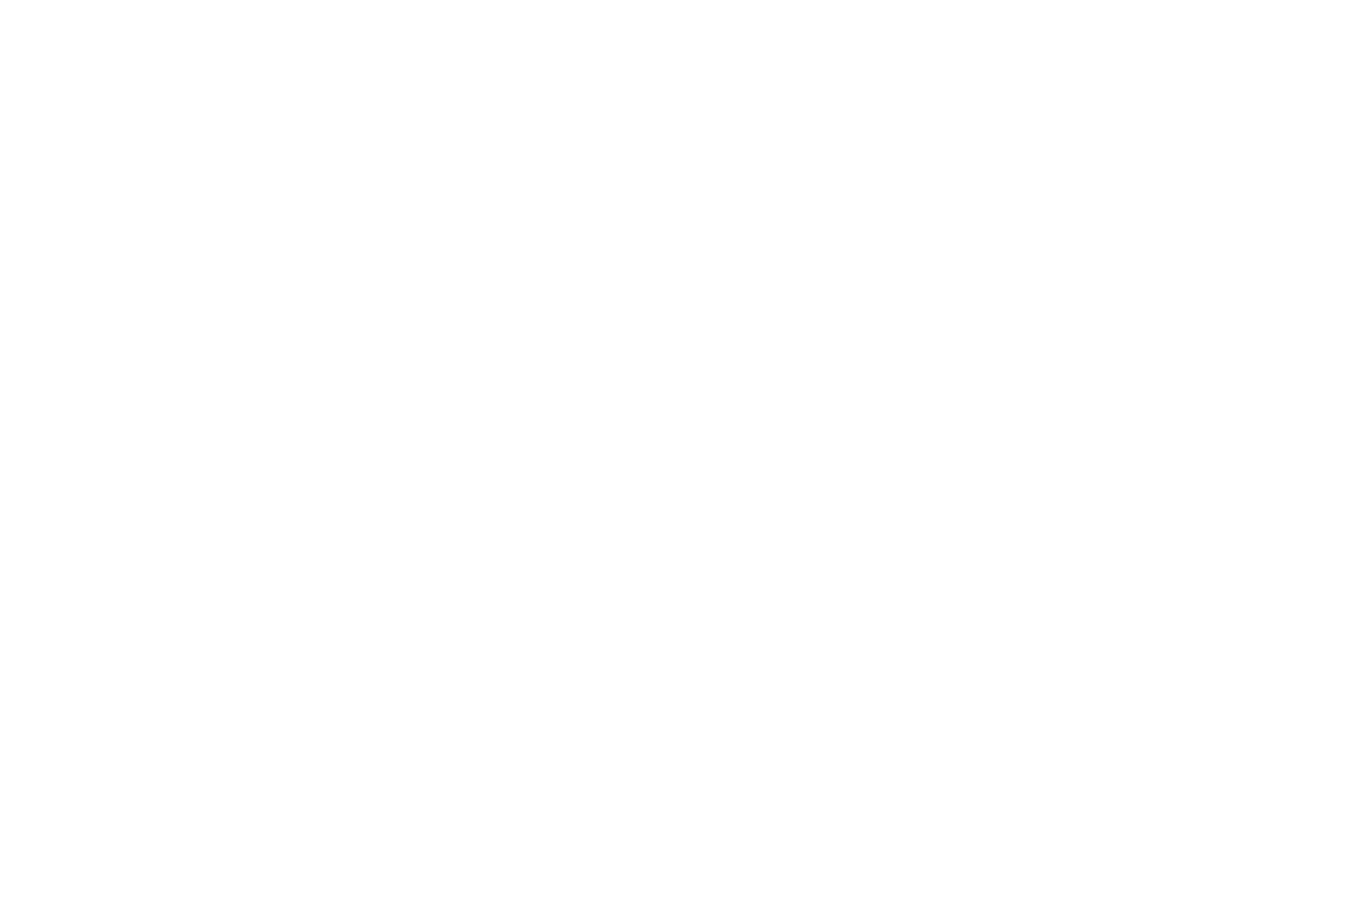

<IPython.core.display.Javascript object>


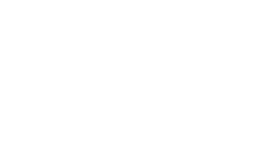

In [160]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols =2, figsize = [15,10], gridspec_kw={'width_ratios': [5, 1]})
fig.suptitle('DAS Deployment on Rhonegletscher')

im = ax1.imshow(normed_das, aspect='auto', norm=matplotlib.colors.LogNorm(vmin = 0.01, vmax = 10), extent = [0, 2308,  times[-1], times[0]]) 
cbar = plt.colorbar(im, ax=ax1)
cbar.set_label('Normalized 30s RMS Strainrate', rotation = '270', labelpad = -40, size = 20)
ax1.grid()
ax1.set_xlabel('Channel')
ax1.set_ylabel('Date')
ax1.yaxis_date()

ax2.plot(f['Discharge'][:], times)
ax2.yaxis_date()
ax2.set_ylim([times[0],times[-1]])
ax2.set_ylim(ax2.get_ylim()[::-1])
ax2.set_xlabel('Discharge $(m^3/s)$')
ax2.set_yticklabels([])
ax2.grid()

plt.tight_layout()
plt.show()

# Model Loss Curves

In [67]:
import numpy as np
import tensorflow as tf
import random
import sys
import eli5

SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

import d2d
import importlib
importlib.reload(d2d)
import pandas as pd
import os

In [68]:
file = "/data/fast0/datasets/Rhone_data_continuous_highpass.h5"

filt = 'Highpass'

history = {}
val_performance = {}
performance = {}

#window_width = [1,2,5, 200]
#window_width = [350, 400, 450, 500]
ww = 200
bs = 32

SEED = 2
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

dropout_num = [0, 0.2]

for dropout in dropout_num:

    linear_model, lstm_model, dnn_model, df_all_chan, das_data_all, f  = d2d.import_data(filename = file)

    da = df_all_chan.to_numpy()

    multi_step_window_shuffled = d2d.WindowGenerator(df_all_chan,
                                                    input_width=ww,
                                                    label_width=1, 
                                                    shift=0,
                                                    label_columns=['Discharge'],
                                                    input_columns=input_columns,
                                                    shuffle=True,
                                                    batch_size=bs)
    
    history['lstm_'+str(dropout)] = d2d.compile_and_fit(lstm_model, multi_step_window_shuffled, learning_rate = 0.001)

    val_performance['lstm_'+str(dropout)] = lstm_model.evaluate(multi_step_window_shuffled.val)
    performance['lstm_'+str(dropout)] = lstm_model.evaluate(multi_step_window_shuffled.test, verbose=0)

Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
2308
Epoch 1/1000
7/7 [==============================] - 4s 278ms/step - loss: 0.7535 - mean_absolute_error: 0.7164 - val_loss: 0.4980 - val_mean_absolute_error: 0.5454
Epoch 2/1000
7/7 [==============================] - 1s 206ms/step - loss: 0.5513 - mean_absolute_error: 0.5731 - val_loss: 0.4154 - val_mean_absolute_error: 0.5090
Epoch 3/1000
7/7 [==============================] - 1s 213ms/step - loss: 0.4334 - mean_absolute_error: 0.4997 - val_loss: 0.3296 - val_mean_absolute_error: 0.4546
Epoch 4/1000
7/7 [==============================] - 2s 230ms/step - loss: 0.3336 - mean_absolute_error: 0.4448 - val_loss: 0.2839 - val_mean_absolute_error: 0.3991
Epoch 5/1000
7/7 [==============================] - 2s 235ms/step - loss: 0.3307 - mean_absolute_error: 0.4393 - val_loss: 0.2652 - val_mean_absolute_error: 0.4104
Epoch 6/1000
7/7 [==============================] - 1s 216ms/step - loss: 0.2394 - mean_absolute_error: 0.3801 - val_lo

Epoch 15/1000
7/7 [==============================] - 1s 219ms/step - loss: 0.0759 - mean_absolute_error: 0.2020 - val_loss: 0.1022 - val_mean_absolute_error: 0.2202
Epoch 16/1000
7/7 [==============================] - 2s 232ms/step - loss: 0.0742 - mean_absolute_error: 0.1971 - val_loss: 0.1014 - val_mean_absolute_error: 0.2360
Epoch 17/1000
7/7 [==============================] - 2s 243ms/step - loss: 0.0665 - mean_absolute_error: 0.1870 - val_loss: 0.0813 - val_mean_absolute_error: 0.2019
Epoch 18/1000
7/7 [==============================] - 2s 246ms/step - loss: 0.0587 - mean_absolute_error: 0.1748 - val_loss: 0.0856 - val_mean_absolute_error: 0.2048
Epoch 19/1000
7/7 [==============================] - 2s 243ms/step - loss: 0.0633 - mean_absolute_error: 0.1829 - val_loss: 0.0906 - val_mean_absolute_error: 0.2186
Epoch 20/1000
7/7 [==============================] - 2s 242ms/step - loss: 0.0518 - mean_absolute_error: 0.1618 - val_loss: 0.0752 - val_mean_absolute_error: 0.1924
Epoch 21/1

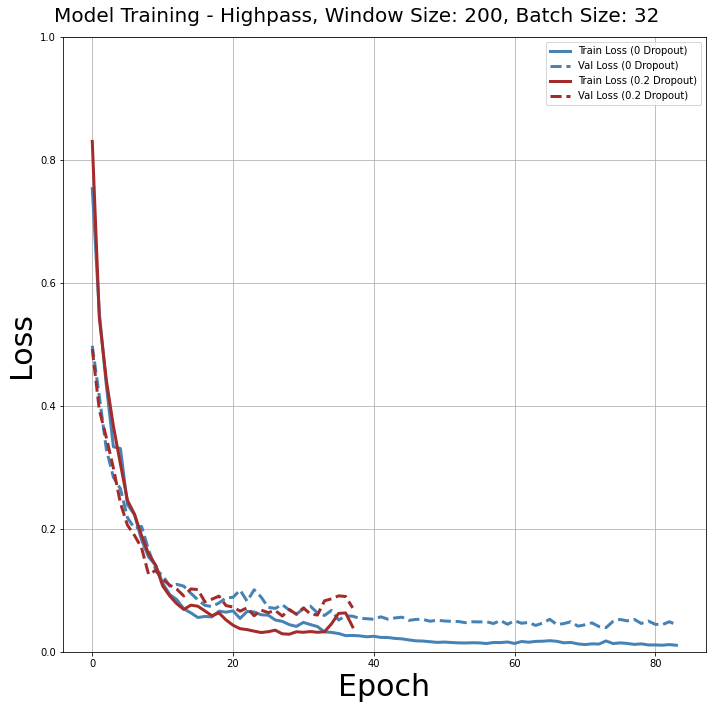

In [69]:
import matplotlib.pyplot as plt

colors = ['steelblue', 'brown']

fig, ax = plt.subplots(figsize=(10,10))
fig.patch.set_facecolor('white')

for dropout, c in zip(dropout_num, colors):
    ax.plot(history['lstm_'+str(dropout)].history['loss'], label='Train Loss ('+str(dropout)+' Dropout)',linewidth=3, c=c)
    ax.plot(history['lstm_'+str(dropout)].history['val_loss'], label='Val Loss ('+str(dropout)+' Dropout)',linewidth=3, ls='--', c=c)


ax.set_ylabel('Loss', size=30)
ax.set_xlabel('Epoch', size=30)
ax.set_ylim((0, 1))
ax.grid()
ax.legend()
fig.suptitle('Model Training - Highpass, Window Size: '+str(ww)+', Batch Size: '+str(bs), fontsize = 20)

plt.tight_layout()
plt.show()

# Model Residuals Plot

In [116]:
#TEST SET RESIDUAL

In [20]:
predictions_test = lstm_model.predict(multi_step_window_shuffled.test).squeeze()

In [21]:
pred_test_dis = []

for i in predictions_test:
    x = (i[-1]*multi_step_window_shuffled.dis_std) + multi_step_window_shuffled.dis_mean
    pred_test_dis.append(x)

In [22]:
true_dis = []

for i in multi_step_window_shuffled.test.as_numpy_iterator():
    true_dis.append(i[1])
    
true_dis = np.asarray(true_dis).squeeze()

true_dis = (true_dis*multi_step_window_shuffled.dis_std)+multi_step_window_shuffled.dis_mean

In [25]:
#true_dis=true_dis.reshape(true_dis.shape[0]*true_dis.shape[1])

In [26]:
residual_test = pred_test_dis - true_dis

residual_test

array([-0.35264492,  0.49926853, -0.1844759 ,  0.1569004 ,  0.30029202,
       -2.6064653 ,  0.2702465 ,  0.2897625 ,  0.25658226,  0.8942642 ,
       -0.56280994, -0.34054947,  0.34095335, -0.58861876,  0.14174795,
       -0.13427639,  0.04575348, -1.0679622 ,  0.8701143 , -0.32005405,
        0.8995037 , -0.47996044, -0.26170063, -1.0863934 ,  0.61328506],
      dtype=float32)

In [27]:
#TRAIN SET RESIDUAL

In [28]:
predictions_train = lstm_model.predict(multi_step_window_shuffled.train).squeeze()

In [29]:
pred_train_dis = []

for i in predictions_train:
    x = (i[-1]*multi_step_window_shuffled.dis_std) + multi_step_window_shuffled.dis_mean
    pred_train_dis.append(x)

In [30]:
true_dis_train = []

for i in multi_step_window_shuffled.train.as_numpy_iterator():
    true_dis_train.append(i[1])
    
true_dis_train = np.asarray(true_dis_train).squeeze()

true_dis_train = (true_dis_train*multi_step_window_shuffled.dis_std)+multi_step_window_shuffled.dis_mean

true_dis_train = true_dis_train.reshape(true_dis_train.shape[0]*true_dis_train.shape[1])

In [31]:
residual_train = pred_train_dis - true_dis_train

residual_train

array([ 0.26354218,  0.60112095,  0.07323551, -0.16694164,  0.58897877,
        0.38181543,  0.14606953,  0.5573673 ,  0.15976048,  0.6445713 ,
       -0.1812067 , -0.17702198,  0.61328506,  0.28560448,  0.08197689,
        0.18089485,  0.7947197 , -0.14123344,  0.4860239 , -0.08794117,
        0.0875864 ,  0.24792957, -0.01789188,  0.36221886,  0.3997345 ,
        0.01444626,  1.0309572 ,  0.32605076,  0.25658226,  0.38818836,
        0.19211674, -0.27368546,  0.31523323,  0.03873253,  0.03579235,
        0.43898582, -0.00941277,  0.8225632 ,  0.6858969 ,  0.08270168,
       -0.42661667,  0.03826237,  0.43533325, -0.11222935, -0.19757175,
       -0.23124123,  0.4225626 ,  0.42616272,  0.46940994,  0.49760103,
        0.28814363,  0.42129707, -0.16459322,  0.09789562,  0.01373291,
        0.18919277, -0.1745553 ,  0.16763878,  0.14428711, -0.38780308,
       -0.17405796, -0.56931686, -0.08657742, -0.28491592,  0.1906538 ,
        0.5482278 ,  0.34338713,  0.3556366 ,  0.29253626,  0.08

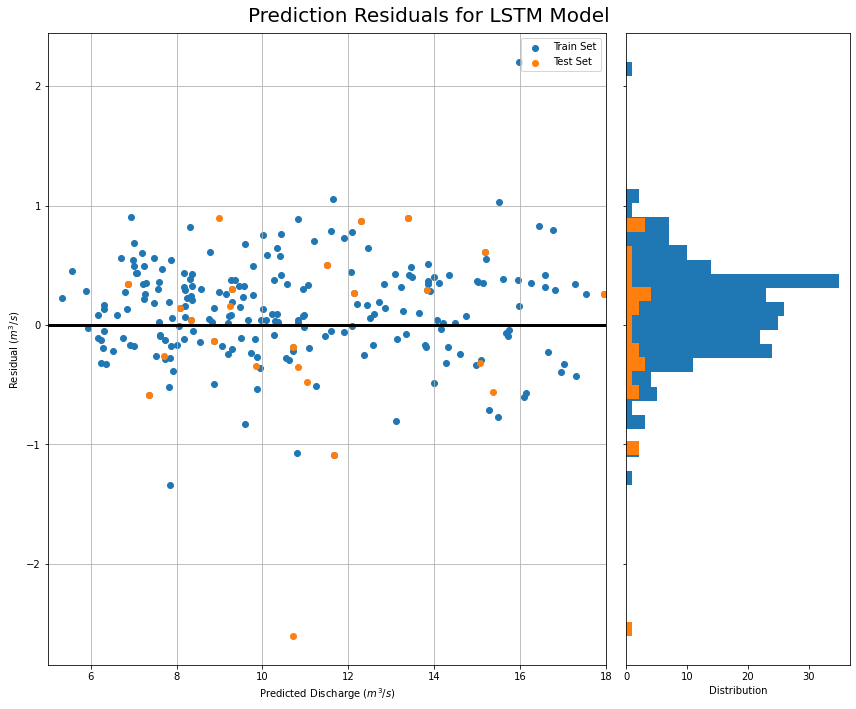

In [32]:
import matplotlib.pyplot as plt

fig, (ax0, ax1) = plt.subplots(1,2, figsize=(12,10), gridspec_kw={'width_ratios': [5, 2]}, sharey = True)
fig.patch.set_facecolor('white')

ax0.plot([5,18],[0,0], color='black', linewidth=3) #0 residual line

ax0.scatter(pred_train_dis, residual_train, label = 'Train Set')
ax0.scatter(pred_test_dis, residual_test, label = 'Test Set')

ax0.set_ylabel('Residual $(m^3/s)$')
ax0.set_xlabel('Predicted Discharge $(m^3/s)$')
ax0.set_xlim([5,18])
ax0.grid()
ax0.legend()

ax1.hist(residual_train, label = 'Train Set', bins=30,orientation = 'horizontal')
ax1.hist(residual_test, label = 'Test Set', bins=30,orientation = 'horizontal')
ax1.set_xlabel('Distribution')

fig.suptitle('Prediction Residuals for LSTM Model', fontsize = 20)

plt.tight_layout()
plt.show()

# Using Linear as a Baseline

In [10]:
import numpy as np
import tensorflow as tf
import random

SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

import d2d
import importlib
importlib.reload(d2d)
import pandas as pd
import os

In [11]:
file = "/data/fast0/datasets/Rhone_data_continuous_highpass.h5"

filt = 'Highpass'

history = {}
val_performance = {}
performance = {}

#window_width = [1,2,5, 200]
window_width = [2, 5, 100, 3000]
#window_width = 100
batch_num = [64, 32, 32, 1]


for ww, bn in zip(window_width, batch_num):
#for window_input_width in window_width:
    
#     SEED = 1
#     random.seed(SEED)
#     np.random.seed(SEED)
#     tf.random.set_seed(SEED)
    
    linear_model, lstm_model, dnn_model,  df_all_chan,  input_columns, das_data_all, f  = d2d.import_data(filename = file)

    da = df_all_chan.to_numpy()

    multi_step_window_shuffled = d2d.WindowGenerator(df_all_chan,
                                                    input_width=ww,
                                                    label_width=1, 
                                                    shift=0,
                                                    label_columns=['Discharge'],
                                                    input_columns=input_columns,
                                                    shuffle=True,
                                                    batch_size=bn)
    
    
    import matplotlib
    import matplotlib.pyplot as plt
    
    
    
    history['lstm_'+str(ww)+'_'+filt+str(bn)] = d2d.compile_and_fit(lstm_model, multi_step_window_shuffled, learning_rate = 0.001)
    history['linear_'+str(ww)+'_'+filt+str(bn)] = d2d.compile_and_fit(linear_model, multi_step_window_shuffled, learning_rate = 0.001)
    
    
    val_performance['lstm_'+str(ww)+'_'+filt+str(bn)] = lstm_model.evaluate(multi_step_window_shuffled.val)
    val_performance['linear_'+str(ww)+'_'+filt+str(bn)] = linear_model.evaluate(multi_step_window_shuffled.val)
    
    performance['lstm_'+str(ww)+'_'+filt+str(bn)] = lstm_model.evaluate(multi_step_window_shuffled.test, verbose=0)
    performance['linear_'+str(ww)+'_'+filt+str(bn)] = lstm_model.evaluate(multi_step_window_shuffled.test, verbose=0)

Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
Epoch 1/100
343/343 [==============================] - 2s 4ms/step - loss: 0.1705 - mean_absolute_error: 0.2973 - val_loss: 0.0802 - val_mean_absolute_error: 0.2000
Epoch 2/100
343/343 [==============================] - 1s 4ms/step - loss: 0.0658 - mean_absolute_error: 0.1816 - val_loss: 0.0597 - val_mean_absolute_error: 0.1710
Epoch 3/100
343/343 [==============================] - 1s 4ms/step - loss: 0.0490 - mean_absolute_error: 0.1559 - val_loss: 0.0538 - val_mean_absolute_error: 0.1597
Epoch 4/100
343/343 [==============================] - 1s 4ms/step - loss: 0.0440 - mean_absolute_error: 0.1452 - val_loss: 0.0411 - val_mean_absolute_error: 0.1396
Epoch 5/100
343/343 [==============================] - 1s 4ms/step - loss: 0.0330 - mean_absolute_error: 0.1260 - val_loss: 0.0389 - val_mean_absolute_error: 0.1340
Epoch 6/100
343/343 [==============================] - 1s 4ms/step - loss: 0.0313 - mean_absolute_error: 0.1200 - val_l

343/343 [==============================] - 1s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0624 - val_loss: 0.0182 - val_mean_absolute_error: 0.0872
Epoch 51/100
343/343 [==============================] - 1s 4ms/step - loss: 0.0067 - mean_absolute_error: 0.0551 - val_loss: 0.0141 - val_mean_absolute_error: 0.0783
Epoch 52/100
343/343 [==============================] - 1s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0610 - val_loss: 0.0199 - val_mean_absolute_error: 0.0934
Epoch 53/100
343/343 [==============================] - 1s 4ms/step - loss: 0.0079 - mean_absolute_error: 0.0591 - val_loss: 0.0150 - val_mean_absolute_error: 0.0798
Epoch 54/100
343/343 [==============================] - 1s 4ms/step - loss: 0.0066 - mean_absolute_error: 0.0545 - val_loss: 0.0145 - val_mean_absolute_error: 0.0773
Epoch 55/100
343/343 [==============================] - 1s 4ms/step - loss: 0.0064 - mean_absolute_error: 0.0535 - val_loss: 0.0144 - val_mean_absolute_error: 0.0762
Epoch 56/100
343/

Epoch 24/100
275/275 [==============================] - 1s 4ms/step - loss: 0.0182 - mean_absolute_error: 0.0942 - val_loss: 0.0294 - val_mean_absolute_error: 0.1156
Epoch 25/100
275/275 [==============================] - 1s 4ms/step - loss: 0.0179 - mean_absolute_error: 0.0928 - val_loss: 0.0271 - val_mean_absolute_error: 0.1096
Epoch 26/100
275/275 [==============================] - 1s 4ms/step - loss: 0.0161 - mean_absolute_error: 0.0885 - val_loss: 0.0302 - val_mean_absolute_error: 0.1144
Epoch 27/100
275/275 [==============================] - 1s 4ms/step - loss: 0.0158 - mean_absolute_error: 0.0875 - val_loss: 0.0285 - val_mean_absolute_error: 0.1164
Epoch 28/100
275/275 [==============================] - 1s 4ms/step - loss: 0.0143 - mean_absolute_error: 0.0833 - val_loss: 0.0262 - val_mean_absolute_error: 0.1084
Epoch 29/100
275/275 [==============================] - 1s 4ms/step - loss: 0.0139 - mean_absolute_error: 0.0815 - val_loss: 0.0274 - val_mean_absolute_error: 0.1089
Epoc

Epoch 16/100
14/14 [==============================] - 1s 54ms/step - loss: 0.0459 - mean_absolute_error: 0.1615 - val_loss: 0.0771 - val_mean_absolute_error: 0.1915
Epoch 17/100
14/14 [==============================] - 1s 55ms/step - loss: 0.0421 - mean_absolute_error: 0.1541 - val_loss: 0.0739 - val_mean_absolute_error: 0.1876
Epoch 18/100
14/14 [==============================] - 1s 56ms/step - loss: 0.0386 - mean_absolute_error: 0.1464 - val_loss: 0.0722 - val_mean_absolute_error: 0.1838
Epoch 19/100
14/14 [==============================] - 1s 54ms/step - loss: 0.0357 - mean_absolute_error: 0.1405 - val_loss: 0.0710 - val_mean_absolute_error: 0.1791
Epoch 20/100
14/14 [==============================] - 1s 56ms/step - loss: 0.0353 - mean_absolute_error: 0.1402 - val_loss: 0.0737 - val_mean_absolute_error: 0.1845
Epoch 21/100
14/14 [==============================] - 1s 54ms/step - loss: 0.0342 - mean_absolute_error: 0.1378 - val_loss: 0.0703 - val_mean_absolute_error: 0.1824
Epoch 22/1

14/14 [==============================] - 1s 54ms/step - loss: 34962176.0000 - mean_absolute_error: 3995.5542 - val_loss: 8503450.0000 - val_mean_absolute_error: 1926.2097
Epoch 16/100
14/14 [==============================] - 1s 51ms/step - loss: 48034692.0000 - mean_absolute_error: 4882.8638 - val_loss: 12889028.0000 - val_mean_absolute_error: 2083.8486
Epoch 17/100
14/14 [==============================] - 1s 54ms/step - loss: 42642360.0000 - mean_absolute_error: 4683.5117 - val_loss: 10150956.0000 - val_mean_absolute_error: 1785.6174
Epoch 18/100
4/4 [==============================] - 0s 15ms/step - loss: 4849413.5000 - mean_absolute_error: 1348.8154


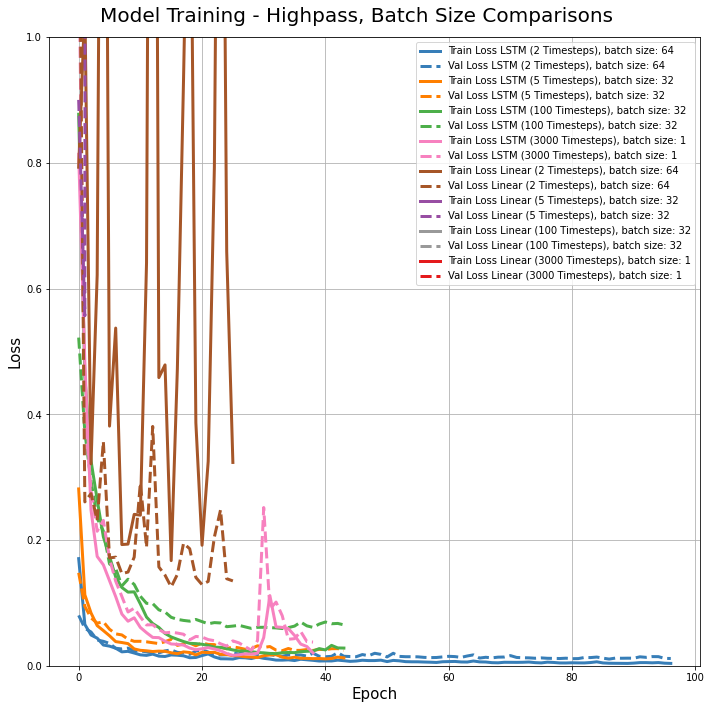

In [15]:
colors =['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c']
fig, ax = plt.subplots(figsize=(10,10))
for hist_LSTM, leg, c in zip(
    ('lstm_'+str(window_width[0])+'_Highpass'+str(batch_num[0]),
     'lstm_'+str(window_width[1])+'_Highpass'+str(batch_num[1]),
     'lstm_'+str(window_width[2])+'_Highpass'+str(batch_num[2]), 
     'lstm_'+str(window_width[3])+'_Highpass'+str(batch_num[3]),
     'linear_'+str(window_width[0])+'_Highpass'+str(batch_num[0]),
     'linear_'+str(window_width[1])+'_Highpass'+str(batch_num[1]),
     'linear_'+str(window_width[2])+'_Highpass'+str(batch_num[2]),
     'linear_'+str(window_width[3])+'_Highpass'+str(batch_num[3])),
                            ('LSTM ('+str(window_width[0])+' Timesteps), batch size: '+str(batch_num[0]),
                             'LSTM ('+str(window_width[1])+' Timesteps), batch size: '+str(batch_num[1]),
                             'LSTM ('+str(window_width[2])+' Timesteps), batch size: '+str(batch_num[2]),
                             'LSTM ('+str(window_width[3])+' Timesteps), batch size: '+str(batch_num[3]),
                             'Linear ('+str(window_width[0])+' Timesteps), batch size: '+str(batch_num[0]),
                             'Linear ('+str(window_width[1])+' Timesteps), batch size: '+str(batch_num[1]),
                             'Linear ('+str(window_width[2])+' Timesteps), batch size: '+str(batch_num[2]),
                             'Linear ('+str(window_width[3])+' Timesteps), batch size: '+str(batch_num[3])),
                          colors):
    
    ax.plot(history[hist_LSTM].history['loss'], label='Train Loss '+leg,linewidth=3, c=c)
    ax.plot(history[hist_LSTM].history['val_loss'], label='Val Loss '+leg,linewidth=3, ls='--', c=c)
    
fig.patch.set_facecolor('white')
ax.set_ylabel('Loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylim((0, 1))
ax.grid()
ax.legend()
fig.suptitle('Model Training - Highpass, Batch Size Comparisons', fontsize = 20)

plt.tight_layout()
plt.show()